<a href="https://colab.research.google.com/github/obeabi/AirlineSentiment/blob/main/Airline_Freq_Tokenization_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Sentiment Dataset
## Written by Abiola Obembe
### Date: 2020-12-24

### Goal: Train a classifiier to predict customer sentiment from customer review text (using Frequency word embeddings)


A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

## Step 1: Data Cleaning and Preprocessing

In [18]:
# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("installation complete!")


installation complete!


In [19]:
# Import dataset
dataset = pd.read_csv('Tweets.csv', encoding= 'latin1', engine='python', quoting = 1)

dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [20]:
# Drop columns not required
dataset.drop(columns = ['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence',
                        'airline', 'airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord',
                        'tweet_created','tweet_location','user_timezone'], axis = 1, inplace = True)
dataset.head(10)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn'tâ¦but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [21]:
#  Investigate the number of distinct sentiments
dataset['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

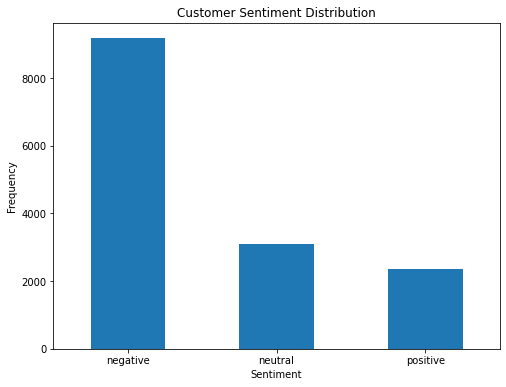

In [22]:
# Lets visualize the sentiments
count_classes = pd.value_counts(dataset['airline_sentiment'], sort = True)
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Customer Sentiment Distribution")
plt.xticks(range(3))
plt.xlabel("Sentiment")
plt.ylabel('Frequency')
plt.show()

In [23]:
# Let us check for missing values in both columns
print(dataset.isnull().sum())

missing_values = dataset.isnull().sum().sum()
print('The total number of missing values in the dataframe is' , str(missing_values))

airline_sentiment    0
text                 0
dtype: int64
The total number of missing values in the dataframe is 0


In [24]:
## Data Cleaning

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
corpus = []
corpus2 = []



for i in range(0,dataset.shape[0]):
  reviews = re.sub(r"@[A-Za-z0-9]+", ' ', dataset['text'][i])
  reviews = re.sub(r'[^a-zA-Z]', ' ',reviews)
  # Removing additional whitespaces
  reviews = re.sub(r" +", ' ', reviews)
  reviews = reviews.lower()
  reviews = reviews.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  wl = WordNetLemmatizer()
  #review = [ps.stem(word) for word in reviews if not word in set(all_stopwords)]

  review2 = [wl.lemmatize(word) for word in reviews if not word in set(all_stopwords)]
  #review = ' '.join(review)
  review2 = ' '.join(review2)
  #corpus.append(review)
  corpus2.append(review2)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# print corpus
#print(corpus)

In [26]:
# print corpus 2
print(corpus2)

['said', 'plus added commercial experience tacky', 'today must mean need take another trip', 'really aggressive blast obnoxious entertainment guest face amp little recourse', 'really big bad thing', 'seriously would pay flight seat playing really bad thing flying va', 'yes nearly every time fly vx ear worm go away', 'really missed prime opportunity men without hat parody http co mwpg grezp', 'well', 'amazing arrived hour early good', 'know suicide second leading cause death among teen', 'lt pretty graphic much better minimal iconography', 'great deal already thinking nd trip amp even gone st trip yet p', 'flying fabulous seductive sky u take stress away travel http co ahlxhhkiyn', 'thanks', 'sfo pdx schedule still mia', 'excited first cross country flight lax mco heard nothing great thing virgin america daystogo', 'flew nyc sfo last week fully sit seat due two large gentleman either side help', 'flying', 'know would amazingly awesome bos fll please want fly', 'first fare may three time

In [27]:
# Let us encode the labels into integers 
from sklearn import preprocessing 
  
# label_encoder 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
dataset['airline_sentiment']= label_encoder.fit_transform(dataset['airline_sentiment']) 
  
dataset['airline_sentiment'].unique() 

array([1, 2, 0])

## Step 2: Tokenization ( Count Vectorization)

In [28]:
# Count Vector Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer,HashingVectorizer
cv = CountVectorizer(11850)
X = cv.fit_transform(corpus2).toarray()
y = dataset['airline_sentiment'].values

print(len(X[0]))

11828


In [29]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Step 4: Address imbalance in dataset

In [33]:
# Oversampling method 
# Class to perform over-sampling using SMOTE and cleaning using Tomek links.
y = dataset['airline_sentiment'].values

#Combination of over- and under-sampling methods
#from imblearn.combine import SMOTETomek
#smk = SMOTETomek(sampling_strategy = 'all', random_state=0)
#X_sm,y_sm = smk.fit_sample(data,y)



# Random Oversampling method
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(sampling_strategy= 'all', random_state=42)
X_os,y_os=os.fit_sample(X,y)



#from imblearn.under_sampling import NearMiss
#ns=NearMiss(sampling_strategy= 'all', random_state = 0.8)
#X_ns,y_ns=ns.fit_sample(X,y)



# Confirm the shape of X and y
print(X.shape)
print(y.shape)

# Confirm new shape of X _train_ov and y_ov
#print(X_sm.shape)
#print(y_sm.shape)

print(X_os.shape)
print(y_os.shape)


#print(X_ns.shape)
#print(y_ns.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(14640, 11828)
(14640,)
(27534, 11828)
(27534,)


In [34]:
# Inspect resampled dataset
from collections import Counter

# FOR SMOTETEK
#print('Original dataset shape %s' % Counter(y))
#print('Resampled dataset shape %s' % Counter(y_sm))


# FOR RANDOM OVERSAMPLING
print('Original dataset shape %s' % Counter(y))
print('Resampled dataset shape %s' % Counter(y_os))

# FOR near miss undersampling
#print("The number of classes before fit {}".format(Counter(y)))
#print("The number of classes after fit {}".format(Counter(y_ns)))

Original dataset shape Counter({0: 9178, 1: 3099, 2: 2363})
Resampled dataset shape Counter({1: 9178, 2: 9178, 0: 9178})


In [35]:
# Spli dataset into train and test split

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test_sm = train_test_split(X_sm, y_sm,train_size=0.8, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os,train_size=0.8, test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X_ns, y_ns,train_size=0.8, test_size=0.2, random_state=0)

[nsample,nshape] = X_train.shape

print(nsample)
print(nshape)

22027
11828


## Step 5: Build and train your Classifier 

### Model 1: Naive Bayes

In [36]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print(classifier)

GaussianNB(priors=None, var_smoothing=1e-09)


In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 0]
 [2 1]
 ...
 [2 2]
 [2 0]
 [0 0]]


In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 800  355  668]
 [  29 1086  713]
 [  14    4 1838]]


0.6762302524060287

In [45]:
#Make prediction and print metrics
from sklearn.metrics import classification_report, roc_auc_score

print( classification_report(y_test,y_pred))
print("The roc_auc_score is :", roc_auc_score(y_test,classifier.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60      1823
           1       0.75      0.59      0.66      1828
           2       0.57      0.99      0.72      1856

    accuracy                           0.68      5507
   macro avg       0.76      0.67      0.66      5507
weighted avg       0.76      0.68      0.66      5507

The roc_auc_score is : 0.7561825721922113


### Model 2: Random Forrest

In [39]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier( criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
# Predicting the Test set results
y_hat = classifier2.predict(X_test)
print(np.concatenate((y_hat.reshape(len(y_hat),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 0]
 [1 1]
 ...
 [2 2]
 [0 0]
 [0 0]]


In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_hat)
print(cm)
accuracy_score(y_test, y_hat)

[[1487  265   71]
 [  45 1725   58]
 [   9   15 1832]]


0.9159251861267478

In [44]:
 #Make prediction and print metrics
from sklearn.metrics import classification_report, roc_auc_score

print( classification_report(y_test,y_hat))
print("The roc_auc_score is :", roc_auc_score(y_test,classifier2.predict_proba(X_test),multi_class='ovr'))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1823
           1       0.86      0.94      0.90      1828
           2       0.93      0.99      0.96      1856

    accuracy                           0.92      5507
   macro avg       0.92      0.92      0.91      5507
weighted avg       0.92      0.92      0.91      5507

The roc_auc_score is : 0.9883967648697612


## Step 7: Save Best Model

In [46]:
import pickle
filename = 'Airline_Sentiment.pickle'
pickle.dump(classifier2, open(filename, 'wb'))